In [1]:
import numpy as np
import pandas as pd
import ast #to convert string representation of lists to actual lists

In [2]:
tracks=pd.read_csv('tracks.csv')
artists=pd.read_csv('artists.csv')

In [3]:
tracks.sample(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
573611,1xIVHGeqg8TlEM8RSyfHSZ,The Power of Your Love - Live,34,296040,0,"['Darlene Zschech', 'West Australian Symphony ...","['6ZLy8YFk7VbamsI5qbYXtw', '3tjuAOn55dpEGxqEnK...",2000-05-02,0.181,0.451,10,-9.561,1,0.0368,0.680,0.000000,0.951,0.279,79.916,4
430495,7trl9yNNlUQcStb3dcD4eU,Mistérios,21,272667,0,['Joyce'],['5644bJMU3NkJN0edhyHV3v'],1980,0.278,0.246,9,-13.054,0,0.0289,0.855,0.000016,0.127,0.165,87.220,4
159459,4OB2Hx9J9607qAwLvB4F63,"Der Rosenkavalier, zweiter Akt: Herr Baron von...",0,346520,0,"['Lotte Lehmann', 'Kerstin Thorborg', 'Emanuel...","['1TAHuD0RCuYhAzN7ExM3i7', '2pbFc8vhiJwdkAEAje...",1938-05-02,0.363,0.654,10,-6.550,0,0.0811,0.995,0.750000,0.539,0.382,143.577,4
508514,7CwvW5UovuTciqJkNGvlPB,"Hívd a nagymamát! - Live, Budapest/2009",20,217773,0,['HALÁSZ JUDIT'],['3H3bvdr76Ikcvz0et52g0E'],2009-01-01,0.681,0.626,0,-8.772,1,0.0750,0.654,0.000000,0.277,0.657,105.686,4
46282,6Yu80CNxGXUBfkmc0zQ8pl,Listen,37,280560,0,['Cymande'],['4hfcSstwnyuBoek1dQwLkG'],1972,0.670,0.572,10,-11.748,1,0.0889,0.391,0.120000,0.120,0.270,100.067,4


In [4]:
artists.sample(5)

,id,followers,genres,name,popularity
1105760,7oWPEUR84IgNAQj4Hqbtoz,278.0,[],Dead in 5,1
112334,01YdxULfdQzZ4STBbJxshC,0.0,[],Tim G Hindmon,0
91782,2GLao6Mv2NfD7dl0gD0qS1,29.0,[],Ivan Repušić,27
823653,1vVYyjFJcl0UDSx5NV6bvc,93.0,[],Kovarski,2
968557,3mRRrABGZo8czSiheNgVGk,8.0,[],Sound Saviour,5


**Data Cleaning and Preprocessing**

In [5]:
tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
artists.isnull().sum()

id             0
followers     11
genres         0
name           3
popularity     0
dtype: int64

In [7]:
tracks.shape

(586672, 20)

In [8]:
artists.shape

(1162095, 5)

In [9]:
tracks.dropna(inplace=True)

In [10]:
tracks.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [11]:
tracks['id_artists']

0                                ['45tIt06XoI0Iio4LBEVpls']
1                                ['14jtPCOoNZwquk5wd9DxrY']
2                                ['5LiOoJbxVSAMkBS2fUm3X2']
3                                ['5LiOoJbxVSAMkBS2fUm3X2']
4                                ['3BiJGZsyX9sJchTqcSA7Su']
                                ...                        
586667                           ['1QLBXKM5GCpyQQSVMNZqrZ']
586668                           ['1dy5WNgIKQU6ezkpZs4y8z']
586669                           ['37M5pPGs6V1fchFJSgCguX']
586670    ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...
586671                           ['0i4Qda0k4nf7jnNHmSNpYv']
Name: id_artists, Length: 586601, dtype: object

In [12]:
id_list = tracks['id_artists'].apply(ast.literal_eval)

In [13]:
tracks['main_artist_id']=id_list.apply(lambda x: x[0]) #keeping the first artist only

In [14]:
tracks['main_artist_id']

0         45tIt06XoI0Iio4LBEVpls
1         14jtPCOoNZwquk5wd9DxrY
2         5LiOoJbxVSAMkBS2fUm3X2
3         5LiOoJbxVSAMkBS2fUm3X2
4         3BiJGZsyX9sJchTqcSA7Su
                   ...          
586667    1QLBXKM5GCpyQQSVMNZqrZ
586668    1dy5WNgIKQU6ezkpZs4y8z
586669    37M5pPGs6V1fchFJSgCguX
586670    4jGPdu95icCKVF31CcFKbS
586671    0i4Qda0k4nf7jnNHmSNpYv
Name: main_artist_id, Length: 586601, dtype: object

In [15]:
artists_renamed=artists.rename(columns={
    'id':'main_artist_id',
    'name':'artist_name',
    'popularity':'artist_popularity'
})

df=tracks.merge(artists_renamed,on='main_artist_id',how='inner')

In [16]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,main_artist_id,followers,genres,artist_name,artist_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0.7440,0.151,0.127,104.851,3,45tIt06XoI0Iio4LBEVpls,91.0,[],Uli,4
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0.0000,0.148,0.655,102.009,1,14jtPCOoNZwquk5wd9DxrY,3.0,[],Fernando Pessoa,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0.0218,0.212,0.457,130.418,5,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0.9180,0.104,0.397,169.980,3,5LiOoJbxVSAMkBS2fUm3X2,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,0.1300,0.311,0.196,103.220,4,3BiJGZsyX9sJchTqcSA7Su,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35


In [17]:
df.shape

(574812, 25)

**Data Filtering**

combined table is too large;
filtering down to include only modern popular songs after year 1980 and a popularity score over 30

In [18]:
df['release_date']=df['release_date'].astype(str)

new_df=df[(df['release_date'].str[:4].astype(int)>=2010) & (df['popularity']>80)].copy()

In [19]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist_id',
       'followers', 'genres', 'artist_name', 'artist_popularity'],
      dtype='object')

In [20]:
new_df.shape

(647, 25)

**Top 50 Popularity based recommender**

In [21]:
popularity_df = new_df[['name', 'artists', 'id', 'popularity']].copy()

In [22]:
top_50_popular_songs=popularity_df.sort_values('popularity',ascending=False).head(50)

In [23]:
top_50_popular_songs

,name,artists,id,popularity
92007,Peaches (feat. Daniel Caesar & Giveon),"['Justin Bieber', 'Daniel Caesar', 'Giveon']",4iJyoBOLtHqaGxP12qzhQI,100
92008,drivers license,['Olivia Rodrigo'],7lPN2DXiMsVn7XUKtOW1CS,99
92009,Astronaut In The Ocean,['Masked Wolf'],3Ofmpyhv5UAQ70mENzB277,98
91048,Save Your Tears,['The Weeknd'],5QO79kh1waicV47BqGRL3g,97
91049,telepatía,['Kali Uchis'],6tDDoYIxWvMLTdKpjFkc1B,97
91051,Blinding Lights,['The Weeknd'],0VjIjW4GlUZAMYd2vXMi3b,96
92010,Leave The Door Open,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",7MAibcTli4IisCtbHKrGMh,96
91052,The Business,['Tiësto'],6f3Slt0GbA2bPZlz0aIFXN,95
91054,Heartbreak Anniversary,['Giveon'],3FAJ6O0NOHQV8Mc5Ri6ENp,94
91055,WITHOUT YOU,['The Kid LAROI'],27OeeYzk6klgBh83TSvGMA,94


**EDA**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

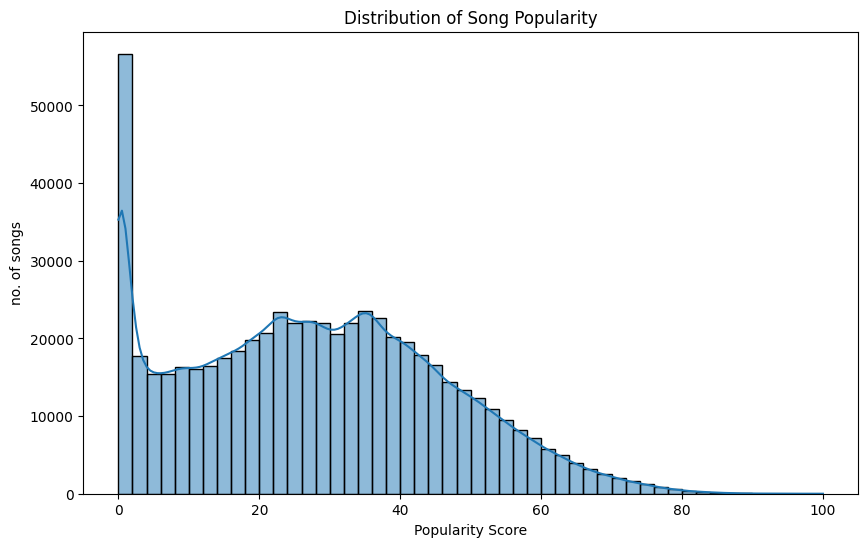

In [25]:
plt.figure(figsize=(10, 6))

sns.histplot(tracks['popularity'],bins=50,kde=True)

plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('no. of songs')

plt.show()

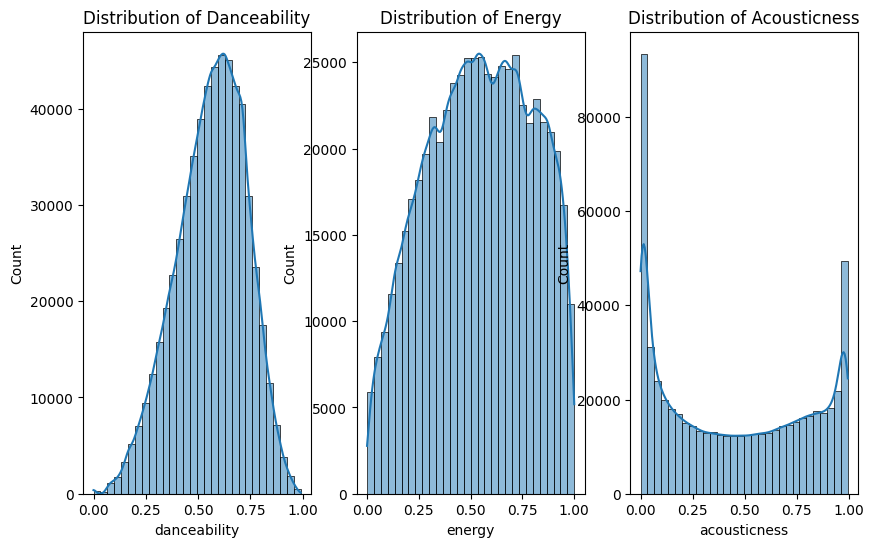

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

sns.histplot(tracks['danceability'],bins=30,kde=True,ax=axes[0])
axes[0].set_title('Distribution of Danceability')

sns.histplot(tracks['energy'],bins=30,kde=True,ax=axes[1])
axes[1].set_title('Distribution of Energy')

sns.histplot(tracks['acousticness'],bins=30,kde=True,ax=axes[2])
axes[2].set_title('Distribution of Acousticness')


plt.show()

In [27]:
tracks['release_year']=pd.to_datetime(tracks['release_date'],errors='coerce').dt.year

In [28]:
tracks['release_year']

0         1922.0
1         1922.0
2         1922.0
3         1922.0
4            NaN
           ...  
586667    2020.0
586668    2020.0
586669    2020.0
586670    2021.0
586671    2015.0
Name: release_year, Length: 586601, dtype: float64

In [29]:
yearly_song_counts=tracks['release_year'].value_counts().sort_index()

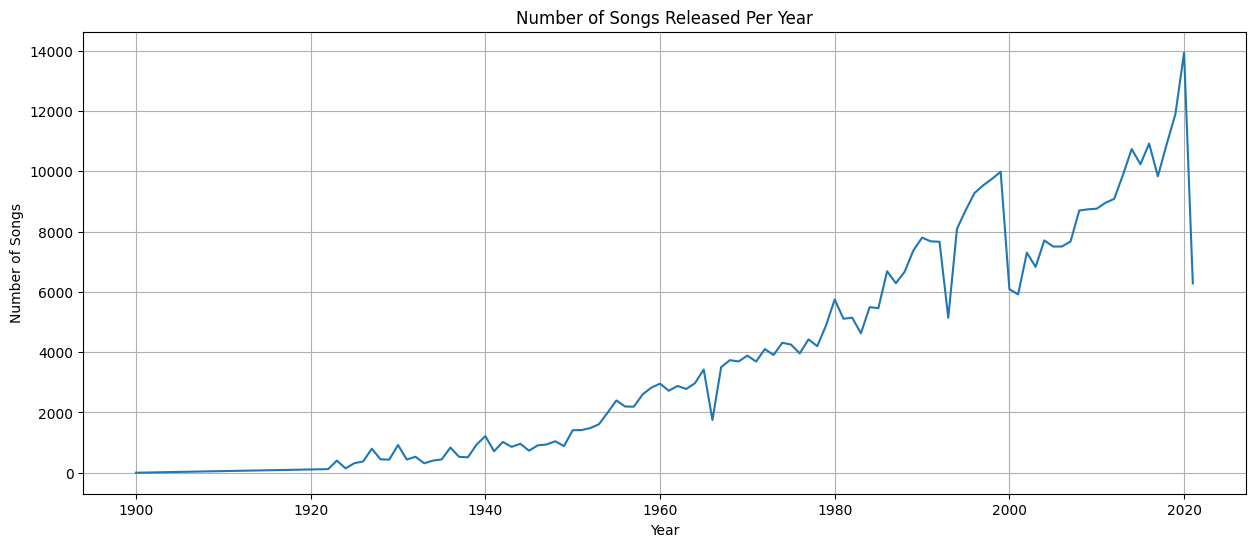

In [30]:
plt.figure(figsize=(15,6))
yearly_song_counts.plot(kind='line')

plt.title('Number of Songs Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.show()

In [31]:
new_df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'main_artist_id',
       'followers', 'genres', 'artist_name', 'artist_popularity'],
      dtype='object')

In [32]:
features_to_use=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

model_df=new_df[['name','artists','id'] + features_to_use].copy()

model_df.drop_duplicates(subset=['name'],keep='first',inplace=True)

model_df.reset_index(drop=True,inplace=True)

In [33]:
model_df.head()

,name,artists,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,"Hey, Soul Sister",['Train'],4HlFJV71xXKIGcU3kRyttv,0.673,0.886,1,-4.440,0,0.0431,0.18500,0.000000,0.0826,0.795,97.012
1,Love The Way You Lie,"['Eminem', 'Rihanna']",15JINEqzVMv3SvJTAXAKED,0.749,0.925,10,-5.034,1,0.2270,0.24100,0.000000,0.5200,0.641,86.989
2,TiK ToK,['Kesha'],0HPD5WQqrq7wPWR7P7Dw1i,0.755,0.837,2,-2.718,0,0.1420,0.09910,0.000000,0.2890,0.714,120.028
3,I Can't Handle Change,['Roar'],0I1eFRytp4XRhLCjT6tZm7,0.247,0.438,5,-8.479,1,0.0358,0.04550,0.000871,0.1110,0.390,185.716
4,Please Don't Go,['Mike Posner'],6jg5SRvdGxvJ0DzNV0UqEK,0.699,0.882,4,-3.896,0,0.0311,0.00296,0.054400,0.1300,0.657,120.016


**Model Building**

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
#scale the features
scaler=MinMaxScaler()
features_to_scale=model_df[features_to_use]
scaled_features=scaler.fit_transform(features_to_scale)

In [36]:
#Calculating similarity
similarity_matrix=cosine_similarity(scaled_features)

In [37]:
similarity_matrix.shape

(620, 620)

In [38]:
def recommend_songs(song_name, data, similarity_matrix):
    try:
        song_index=data[data['name']==song_name].index[0]
    except IndexError:
        return f"Song '{song_name}' not found. Please check the spelling."
    
    similarity_scores=list(enumerate(similarity_matrix[song_index]))
    
    sorted_scores=sorted(similarity_scores,key=lambda x: x[1], reverse=True)
    
    top_songs_indices=[i[0] for i in sorted_scores[1:6]]
    
    return data.iloc[top_songs_indices][['name','artists','id']]    

In [39]:
recommend_songs('Blinding Lights', model_df, similarity_matrix)

,name,artists,id
109,Thunder,['Imagine Dragons'],1zB4vmk8tFRmM9UULNzbLB
196,God is a woman,['Ariana Grande'],5OCJzvD7sykQEKHH7qAC3C
202,Lean Wit Me,['Juice WRLD'],3oDkdAySo1VQQG0ptV7uwa
536,On The Ground,['ROSÉ'],2pn8dNVSpYnAtlKFC8Q0DJ
446,Forever After All,['Luke Combs'],6IBcOGPsniK3Pso1wHIhew


In [40]:
import pickle

pickle.dump(top_50_popular_songs,open('popular.pkl','wb'))

pickle.dump(model_df.to_dict(),open('songs_dict.pkl','wb'))

# pickle.dump(similarity_matrix,open('similarity.pkl','wb'))
np.save('scaled_features.npy',scaled_features)
print("scaled_features.npy saved")

scaled_features.npy saved
